In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[27.46107294]
-4.320242034045512


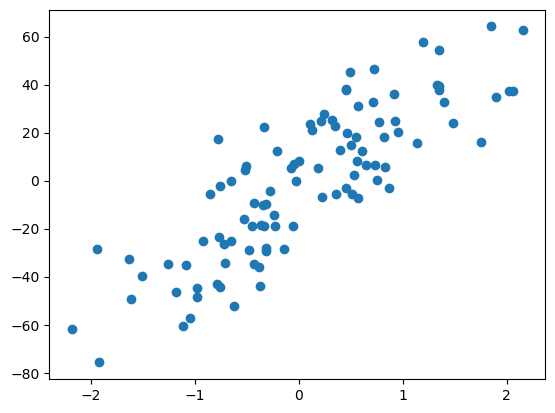

In [5]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

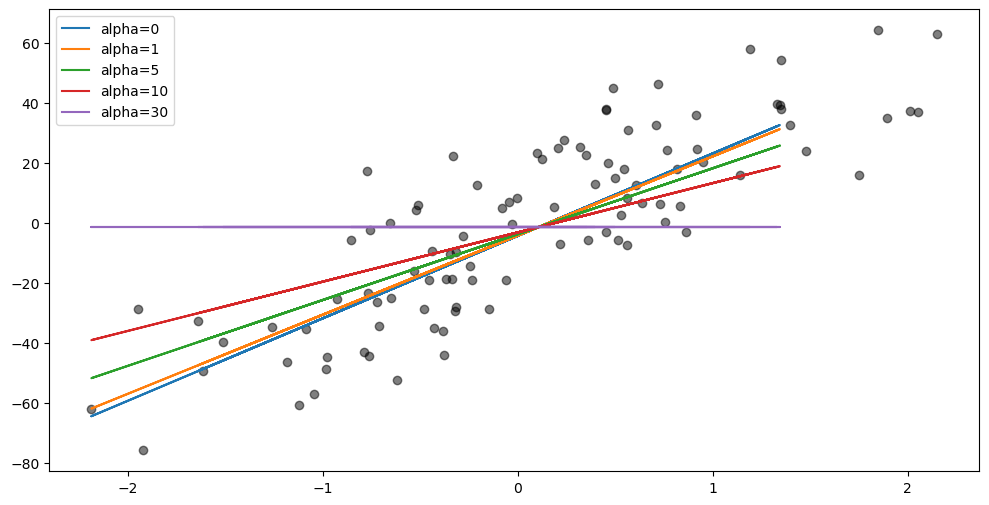

In [8]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

alphas = [0, 1, 5, 10, 30]

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='black', alpha=0.5)

for i in alphas:
    if i == 0:
        model = LinearRegression()
        model.fit(X_train_s, y_train)
        y_pred = model.predict(X_test_s)
    else:
        model = Lasso(alpha=i, max_iter=10000)
        model.fit(X_train_s, y_train)
        y_pred = model.predict(X_test_s)

    plt.plot(X_test, y_pred, label=f'alpha={i}')

plt.legend()
plt.show()


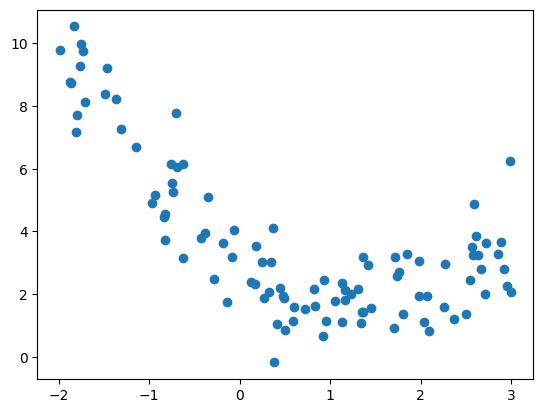

In [12]:

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, LinearRegression

def get_preds(X, y, alpha):
    if alpha == 0:
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=16)),
            ('lr', LinearRegression())
        ])
    else:
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=16)),
            ('scaler', StandardScaler()),
            ('lasso', Lasso(alpha=alpha, max_iter=20000))
        ])

    model.fit(X, y)
    return model.predict(X)
    

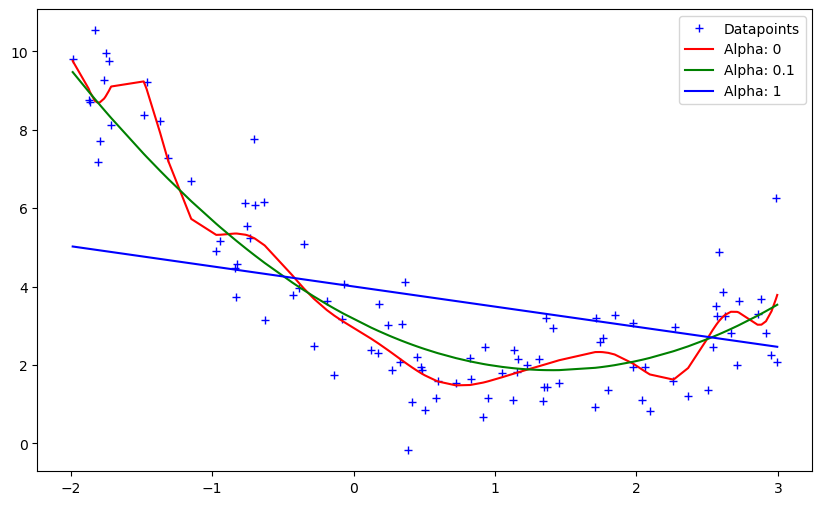

In [15]:
alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds(x1, x2, alpha)
    plt.plot(
        sorted(x1[:,0]),
        preds[np.argsort(x1[:,0])],
        c,
        label=f'Alpha: {alpha}'
    )

plt.legend()
plt.show()